In [8]:
# JEAN PAUL RAZZOUK ID# 12180011
# ELIAS FARAH ID#12180378
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point
import pyproj
import matplotlib.pyplot as plt

In [9]:
leb = pd.read_csv("lebanon_administrative_boundaries_province_polygon.csv")

import geopandas
df = pd.read_csv("lebanon_administrative_boundaries_province_polygon.csv")
df['geometry'] = df.apply(lambda x:Point(float(x.X),float(x.Y)),axis=1)
df = geopandas.GeoDataFrame(df,geometry='geometry')
df.to_file('lebanon.shp',driver = 'ESRI Shapefile')
leba = geopandas.read_file('lebanon.shp')

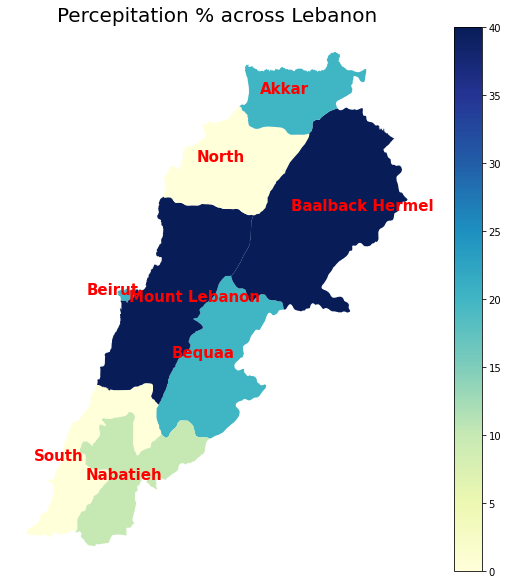

In [21]:
leb_data = gpd.read_file('lebanon_administrative_boundaries_province_polygon.shp')
fig,ax = plt.subplots(figsize=(10,10))
ax.axis('off')

leb_data.plot(column=leb['perc'],legend=False,scheme='Quantiles',cmap='YlGnBu',ax=ax)

for x, y, label in zip(leba.geometry.centroid.x, leba.geometry.centroid.y, leba.name):
    ax.annotate(label, xy=(x, y), xytext=(-40, 0), textcoords="offset points",color='red',size='15',weight='bold')

vmin,vmax = 0,40
sm = plt.cm.ScalarMappable(cmap ='YlGnBu',norm=plt.Normalize(vmin=vmin,vmax=vmax))
sm._A=[]
cbar = fig.colorbar(sm)
    
plt.title("Percepitation % across Lebanon",size=20)
plt.show()